<a href="https://colab.research.google.com/github/juhumkwon/Data/blob/main/%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94(%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC_%ED%8A%B8%EB%9E%98%ED%94%BD_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%EC%83%81%EC%A7%95%ED%9B%84_%ED%83%90%EC%A7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       500
           1       0.55      1.00      0.71        30

    accuracy                           0.95       530
   macro avg       0.77      0.97      0.84       530
weighted avg       0.97      0.95      0.96       530



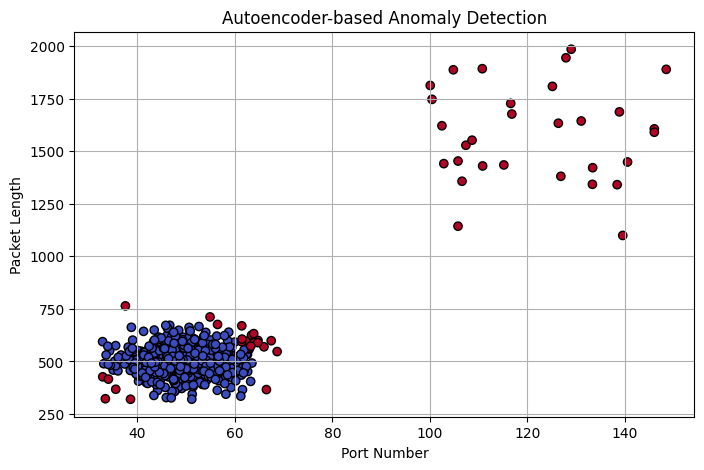

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. 정상 데이터 생성 (포트 번호, 패킷 길이)
normal_data = np.random.multivariate_normal(
    mean=[50, 500],
    cov=[[50, 0], [0, 5000]],
    size=500
)

# 2. 이상 데이터 생성
anomalies = np.random.uniform(low=[100, 1000], high=[150, 2000], size=(30, 2))

# 3. 전체 데이터 결합
all_data = np.concatenate([normal_data, anomalies], axis=0)
labels = np.array([0]*500 + [1]*30)  # 0: 정상, 1: 이상

# 4. 정규화
scaler = StandardScaler()
all_data_scaled = scaler.fit_transform(all_data)
normal_scaled = all_data_scaled[labels == 0]

# 5. 오토인코더 모델 정의
input_dim = normal_scaled.shape[1]
encoding_dim = 2

autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(encoding_dim, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')

# 6. 정상 데이터로만 학습
autoencoder.fit(normal_scaled, normal_scaled, epochs=50, batch_size=32, verbose=0)

# 7. 전체 데이터에 대한 재구성 오차 계산
reconstructions = autoencoder.predict(all_data_scaled)
mse = np.mean(np.square(all_data_scaled - reconstructions), axis=1)

# 8. 임계값(threshold) 설정 및 이상치 탐지
threshold = np.percentile(mse[:500], 95)  # 정상 기준 상위 5%
predicted_labels = (mse > threshold).astype(int)

# 9. 결과 평가
from sklearn.metrics import classification_report
print(classification_report(labels, predicted_labels))

# 10. 시각화
plt.figure(figsize=(8, 5))
plt.scatter(all_data[:, 0], all_data[:, 1], c=predicted_labels, cmap="coolwarm", edgecolors="k")
plt.title("Autoencoder-based Anomaly Detection")
plt.xlabel("Port Number")
plt.ylabel("Packet Length")
plt.grid(True)
plt.show()
